# SALES EDA: Rishika


In [1]:
import pandas as pd
import os

In [2]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")


all_months_data= pd.DataFrame()

files=[ file for file in os.listdir('./Sales_Data')]
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data= pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv", index=False) 

In [3]:
all_data=pd.read_csv("all_data.csv")

In [4]:
#cleaning the data:
#drop rows of nan:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data= all_data.dropna(how='any')

In [5]:
all_data=all_data[all_data['Order Date']!='Order Date']

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])

In [8]:
#add columns
#month 
all_data['Order Date']=all_data['Order Date'].astype(str)
all_data['month']= all_data['Order Date'].apply(lambda x: x.split("/")[0])
all_data['month']= all_data['month'].astype('int32')

In [9]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
all_data['sales']= all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
results=all_data.groupby('month').sum()


In [12]:
from matplotlib import pyplot as plt

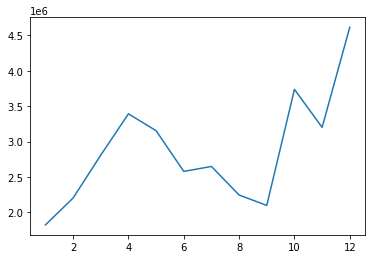

In [13]:
plt.plot(all_data.groupby('month').sum()['sales'])

Text(0.5, 0, 'month number')

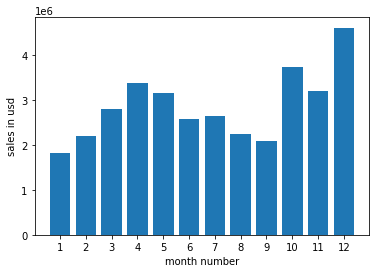

In [14]:
months=range(1,13)
plt.bar(months, results['sales'])
plt.xticks(months)
plt.ylabel('sales in usd')
plt.xlabel('month number')

In [15]:
def get_state(address):
    return address.split(",")[2].split(" ")[1]
def get_city(address):
    return address.split(",")[1]
all_data['city']= all_data['Purchase Address'].apply(lambda x: f"{ get_city(x)}  ({get_state(x)})")

In [16]:

all_data.head()
cityresult=all_data.groupby('city').sum()
cityresult

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


In [17]:
cityresult[cityresult['sales']==cityresult['sales'].max()]

,Quantity Ordered,Price Each,month,sales
city,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


Text(0.5, 0, 'cities')

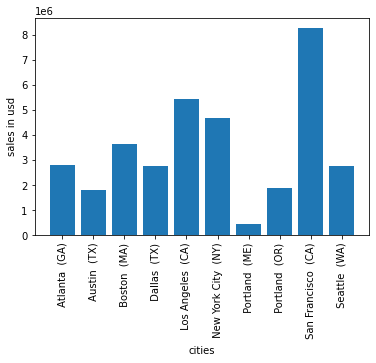

In [18]:
cities= [city for city, df in all_data.groupby('city')] #makes sure the order is maintained 
plt.bar(cities , cityresult['sales'])
plt.xticks(cities, rotation="vertical", size=10)
plt.ylabel('sales in usd')
plt.xlabel('cities') 


## what is the best time for displaying advertisments so that sales are better?


In [26]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:27


In [38]:
all_data['hour']= all_data['Order Date'].dt.hour
all_data['minute']= all_data['Order Date'].dt.minute

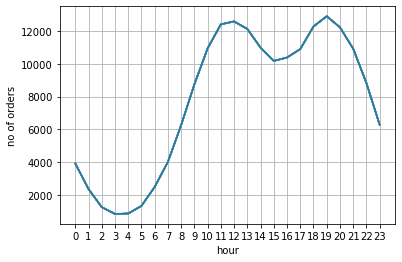

In [47]:
hours= [hour for hour, df in all_data.groupby('hour')]

plt.plot(hours, all_data.groupby('hour').count())
plt.xticks(hours)
plt.xlabel('hour')
plt.grid()
plt.ylabel('no of orders')
plt.show()
#recommendation: release ads around 11-12 or around 7pm

In [94]:
#What products are most often sold together?

In [96]:
orders=all_data[all_data['Order ID'].duplicated(keep=False)]
orders.head(10)
orders['grouped']= orders.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

<ipython-input-96-26e7cf58482a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['grouped']= orders.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


In [100]:
orders=orders[['Order ID', "grouped"]].drop_duplicates()
orders.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [111]:
#REVISE THIS ONE
from itertools import combinations
from collections import Counter

count= Counter()

for row in orders['grouped']:
    row_list= row.split(",")
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [112]:
#WHAT PRODUCT IS SOLD THE MOST AND WHY?
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,time,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),08:46,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22:30,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14:38,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14:38,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),09:27,9,27


In [143]:
maxpro=all_data.groupby('Product')


In [142]:
maxquan= maxpro['Quantity Ordered'].sum()
maxquan.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

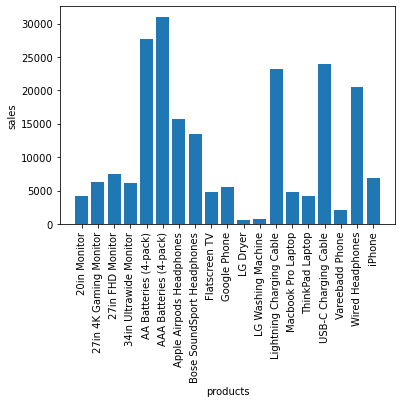

In [150]:
products= [product for product, df in maxpro]
plt.bar(products, maxquan)
plt.xticks(products, rotation= 'vertical', size=10)
plt.xlabel('products')
plt.ylabel('sales')
plt.show()

The max product sold was AAA batteries because of the reason that the battery runs out of power on regular usage and also most sold products are cheap.

<ipython-input-158-6ec4029a84c2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=9)


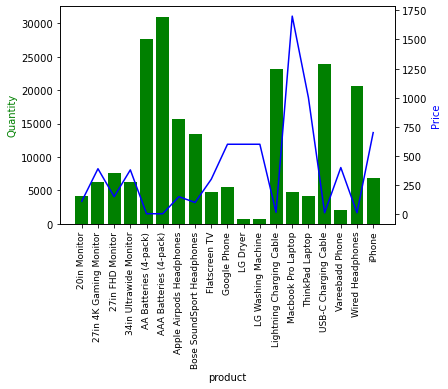

In [158]:
#Seeing if there is a direct correlation bw prices and no of products sold
prices=all_data.groupby('Product').mean()['Price Each']

fig, ax1= plt.subplots()
ax2= ax1.twinx()
ax1.bar(products,maxquan, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('product')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=9)
plt.show()

In [159]:
#this shows that quantity ordered somehow depends on price 